# Benchmark Results

This notebook shows the results of running the benchmark program on various systems.

## Setup

Let's import some libraries we will need:

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

And import the results:

In [2]:
rdir = Path('results')

In [3]:
results = pd.concat({
    f.stem: pd.read_table(f, sep='\t')
    for f in rdir.glob('*.tsv')
}, names=['System']).reset_index('System').reset_index(drop=True)

## Result Table

Let's compute a result table, showing MiB/s for each algorithm:

In [4]:
tbl = results.pivot(index='System', columns='hash', values='MiB/s')
tbl

hash,MD5,SHA-1,SHA-256,SHA-512,SHA3-256,SHA3-512
System,,,,,,
Atom D2701,173.441655,117.030172,24.028131,77.119714,48.139402,29.028915
MBA M2,594.688373,864.382926,347.134836,552.295339,613.384104,323.613251
i7-1185G7 SL4,575.862766,1774.271374,1652.526270,483.402343,348.436099,182.719920
i9-9900,789.060500,740.992958,288.654339,548.566901,374.806355,198.361541


And a barchart for fun:

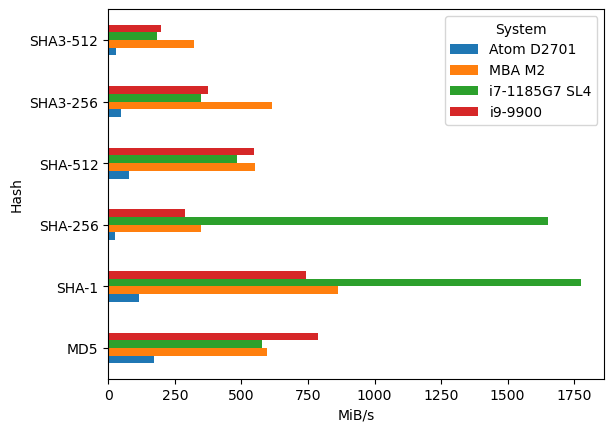

In [5]:
tbl.T.plot.barh()
plt.xlabel('MiB/s')
plt.ylabel('Hash')
plt.show()